In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
data_train = pd.read_csv('data_train_clean.csv')
data_train.head()

,Unnamed: 0,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [33]:
labels = ['Alta', 'Media', 'Baja']
women_h = 0
women_m = 0
women_l = 0


for sur, woman, class_1, class_2, class_3 in zip(data_train.Survived, data_train.Sex_female, data_train.Pclass_1, data_train.Pclass_2, data_train.Pclass_3):
    if sur == 1 and woman == 1:
        if class_1==1:
            women_h = women_h+1
        elif class_2 ==1:
            women_m = women_m + 1
        elif class_3 == 1:
            women_l = women_l+1
print(women_h, women_m, women_l)

91 70 72


In [32]:
men_h = 0
men_m = 0
men_l = 0
for surv, man, c1, c2, c3 in zip(data_train.Survived, data_train.Sex_male, data_train.Pclass_1, data_train.Pclass_2, data_train.Pclass_3):
    if surv == 1 and man ==1:
        if c1 ==1:
            men_h = men_h +1
        if c2 == 1:
            men_m = men_m +1
        if c3 == 1:
            men_l = men_l +1
print(men_h, men_m, men_l)

45 17 47


In [35]:
women_surv = (women_h, women_m, women_l)
men_surv = (men_h, men_m, men_l)

## Graficando

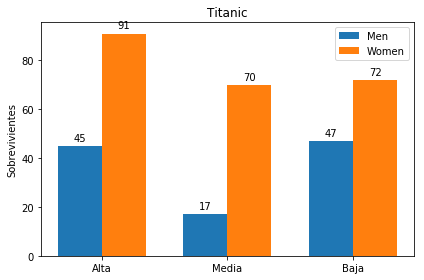

In [46]:
%matplotlib inline
x = np.arange(len(labels)) # localizacion de las etiquetas
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#fig.figure(figsize = (16,9))
rects1 = ax.bar(x - width/2, men_surv, width, label='Men')
rects2 = ax.bar(x + width/2, women_surv, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sobrevivientes')
ax.set_title('Titanic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()